In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_fichier = pd.read_csv("./fichiers/Spotify.csv", sep = ",")
df_fichier

,ID,Artistes,Titre,Durée,Année,Valence,Acoustique,Dansant,Énergie,Explicite,Instrumental,Tonalité,Direct,Intensité,Mode,Discours,Tempo,Popularité
0,4BJqT0PrAfrxzMOxytFOIz,"['Sergei Rachmaninoff', 'James Levine', 'Berli...","Piano Concerto No. 3 in D Minor, Op. 30: III. ...",831667,1921,0.0594,0.98200,0.279,0.211,Non,0.878000,10.0,0.6650,-20.096,Majeur,0.0366,80.954,4
1,7xPhfUan2yNtyFG0cUWkt8,['Dennis Day'],Clancy Lowered the Boom,180533,1921,0.9630,0.73200,0.819,0.341,Non,0.000000,7.0,0.1600,NaN,Majeur,0.4150,60.936,5
2,1o6I8BglA6ylDMrIELygv1,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,Gati Bali,500062,1921,0.0394,0.96100,0.328,0.166,Non,0.913000,3.0,0.1010,-14.850,Majeur,0.0339,110.339,5
3,3ftBPsC5vPBKxYSee08FDH,['Frank Parker'],Danny Boy,210000,1921,0.1650,0.96700,0.275,0.309,Non,0.000028,5.0,0.3810,-9.316,Majeur,0.0354,100.109,3
4,4d6HGyGT8e121BsdKmw9v6,['Phil Regan'],When Irish Eyes Are Smiling,166693,1921,0.2530,0.95700,0.418,0.193,Non,0.000002,3.0,0.2290,-10.096,Majeur,0.0380,101.665,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0KkIkfsLEJbrcIhYsCL7L5,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",China,301714,2020,0.6080,0.08460,0.786,0.808,Non,0.000289,7.0,0.0822,-3.702,Majeur,0.0881,105.029,72
170649,0OStKKAuXlxA0fMH54Qs6E,['Ashnikko'],Halloweenie III: Seven Days,150654,2020,0.7340,0.20600,0.717,0.753,Non,0.000000,7.0,0.1010,-6.020,Majeur,0.0605,137.936,68
170650,4BZXVFYCb76Q0Klojq4piV,['MAMAMOO'],AYA,211280,2020,0.6370,0.10100,0.634,0.858,Non,0.000009,4.0,0.2580,-2.226,Mineur,0.0809,91.688,76
170651,5SiZJoLXp3WOl3J4C8IK0d,['Eminem'],Darkness,337147,2020,0.1950,0.00998,0.671,0.623,Oui,0.000008,2.0,0.6430,-7.161,Majeur,0.3080,75.055,70


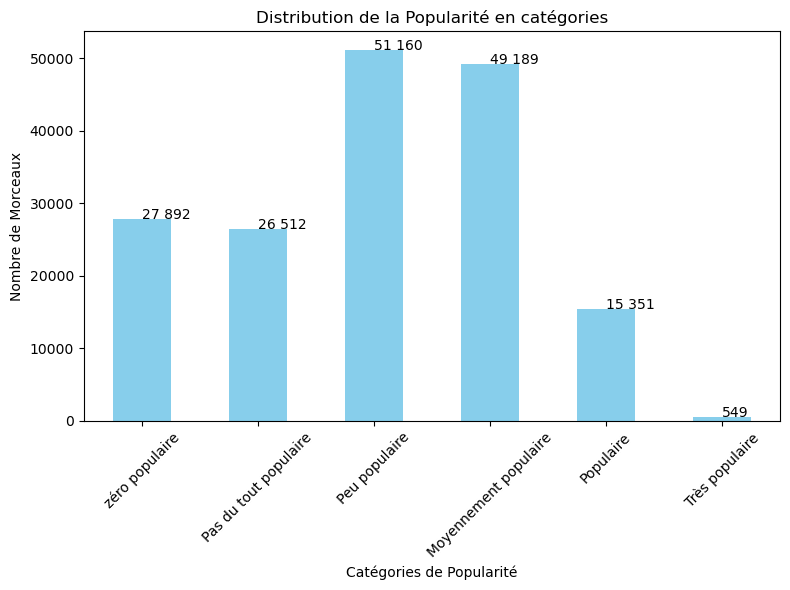

In [2]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],'{:,}'.format(y[i]).replace(',', ' '))
        
#version virgule: f'{y[i]: ^.0f}'

# Création des catégories de popularité 

categories_popularite = ['zéro populaire','Pas du tout populaire', 'Peu populaire', 'Moyennement populaire', 'Populaire', 'Très populaire'] 

  

# Définition des intervalles pour les catégories 

bornes_intervalles = [ -1,0, 20,40,60, 80,100]  

  

# Regroupement des morceaux par catégories de popularité 

df_fichier['CategoriePopularite'] = pd.cut(df_fichier['Popularité'], bins=bornes_intervalles, labels=categories_popularite) 

  

# Compter le nombre de morceaux dans chaque catégorie 

nombre_morceaux_par_categorie = df_fichier['CategoriePopularite'].value_counts().sort_index() 


# Création de l'histogramme 

plt.figure(figsize=(8, 6)) 

nombre_morceaux_par_categorie.plot(kind='bar', color='skyblue') 

plt.title('Distribution de la Popularité en catégories') 

plt.xlabel('Catégories de Popularité') 

plt.ylabel('Nombre de Morceaux') 

addlabels(categories_popularite, nombre_morceaux_par_categorie )

plt.xticks(rotation=45) 

plt.tight_layout() 

plt.show() 

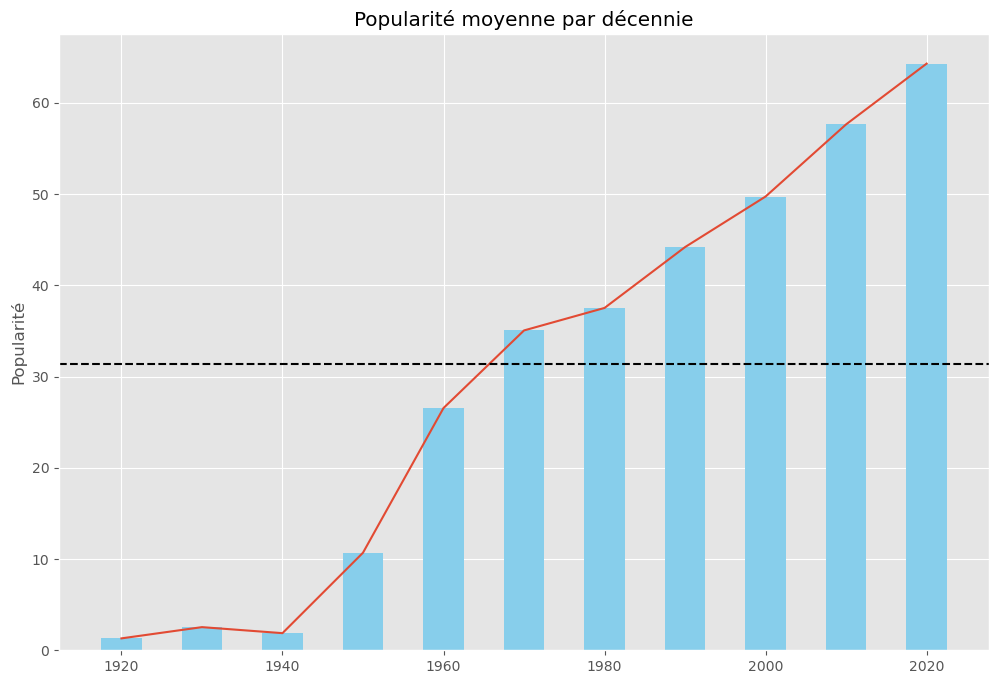

In [3]:
#regrouper les années par décennie
décennie = df_fichier["Année"]//10*10

#popularité moyenne par décennie
grouped_décennie= pd.DataFrame(df_fichier.groupby(décennie)["Popularité"].mean()).reset_index()

#grouped_décennie

#diagramme à bâtonnets
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use("ggplot")

fig, ax = plt.subplots(figsize = (12,8))

ax.bar(grouped_décennie["Année"], grouped_décennie["Popularité"],width = 5,color = "skyblue")
ax.plot(grouped_décennie["Année"], grouped_décennie["Popularité"])

ax.set_ylabel("Popularité")
ax.axhline(df_fichier["Popularité"].mean(), color = "black",linestyle = "--")
plt.title("Popularité moyenne par décennie") 


plt.savefig("popularité_bar_an.png")
plt.show()

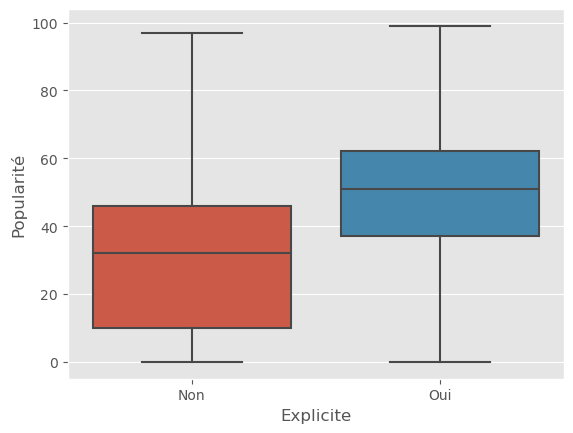

In [4]:
#Observation: les parales explictes ont une plus grande popularité
fig, ax = plt.subplots()
sns.boxplot(x="Explicite",y="Popularité", data = df_fichier, ax=ax)
plt.show()

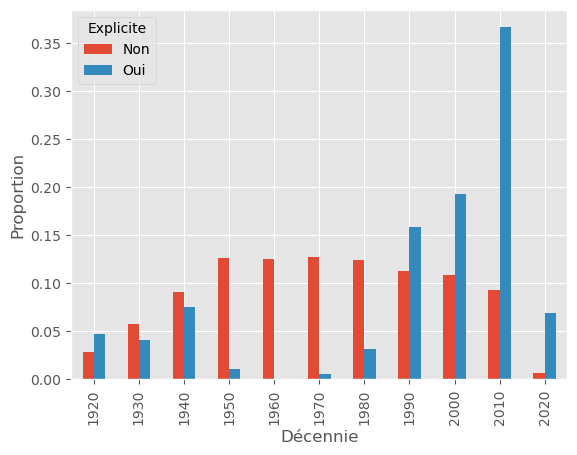

In [5]:
df_decennie_expl = df_fichier.copy()

#regrouper les années par décennie
df_decennie_expl["décennie"] = df_fichier["Année"]//10*10

#calculer la proportion des paroles explictes de chaque année
repartitions_explicite = df_decennie_expl.pivot_table("Artistes", index = "décennie", columns = "Explicite", aggfunc = "count")
repartitions_explicite = repartitions_explicite.div(repartitions_explicite.sum(axis=0))
repartitions_explicite

#diagramme à batônnets
fig, ax = plt.subplots()
repartitions_explicite.plot.bar(ax = ax)

# Le retour de l'objet d'axes permet d'appliquer les méthodes de matplotlib
ax.set_xlabel("Décennie", fontsize = 12)
ax.set_ylabel("Proportion", fontsize = 12);

plt.show()

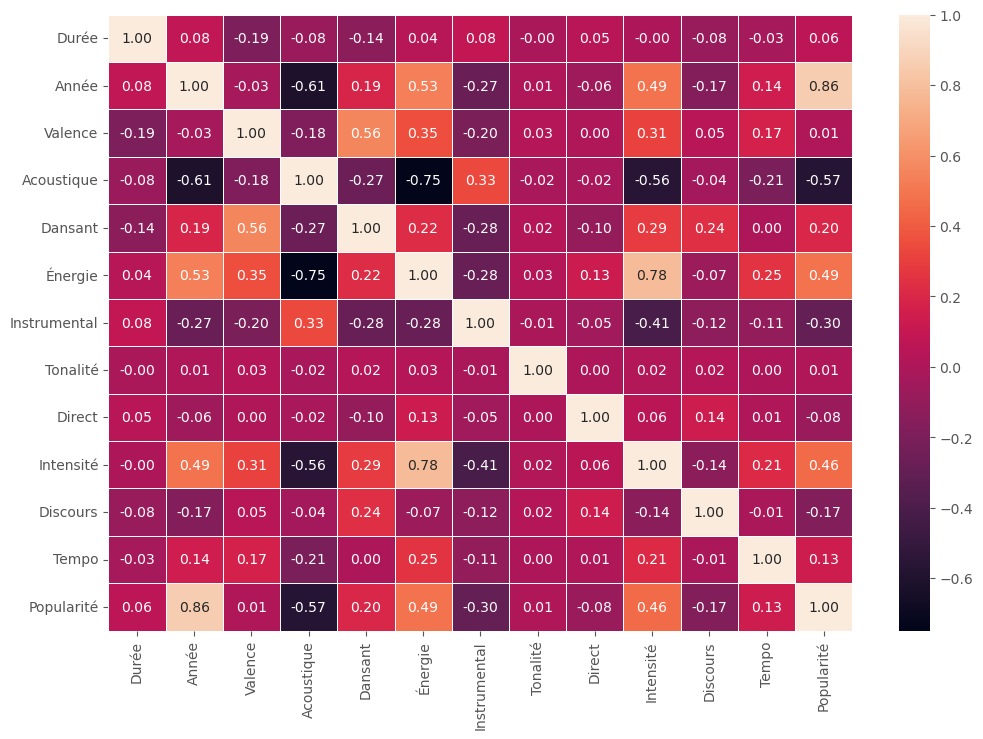

In [6]:
#Examiner la corrélation entre la popularité et les autres variables
test = df_fichier.select_dtypes(include = ["number"])
corr = test.corr(method = "pearson")

fig, ax = plt.subplots(figsize=(12,8))
hm = sns.heatmap(data = corr,annot=True,fmt=".2f", linewidth=.6)
plt.show()
#la popularité n'a pas une corrélation significative avec les autres variables à part l'année

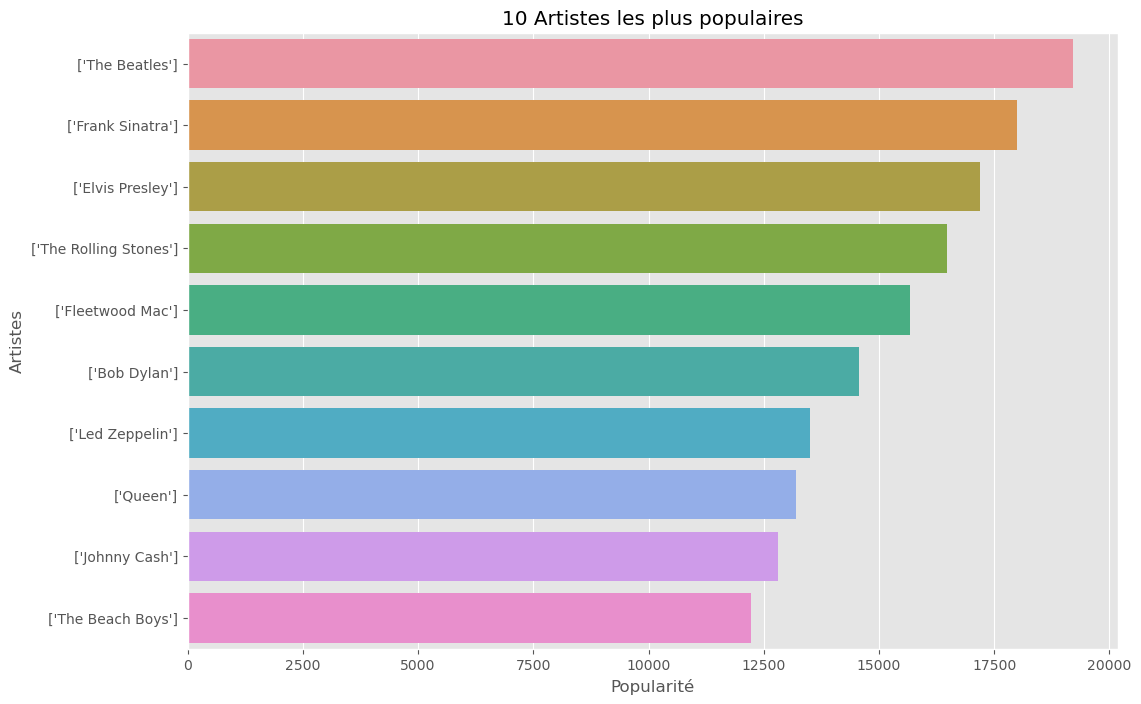

In [7]:
df_artistes = df_fichier[["Artistes", "Popularité"]].copy()
#df_artistes["Artistes"] = df_artistes["Artistes"].str.replace("["," ").str.replace("]"," ").str.replace(","," et").str.replace("'"," ")
df_artistes_top10 = df_artistes.groupby("Artistes").sum().reset_index() #créer un nouveau df au lieu d'un groupby objet
df_artistes_top10_sorted = df_artistes_top10.sort_values("Popularité", ascending=False).head(10)
#df_artistes_top10_sorted

#un diagramme à batônnets des 10 artistes les plus populaires entre 1920 à 2020
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(y = "Artistes", x = "Popularité", data = df_artistes_top10_sorted).set(title='10 Artistes les plus populaires')
plt.show()

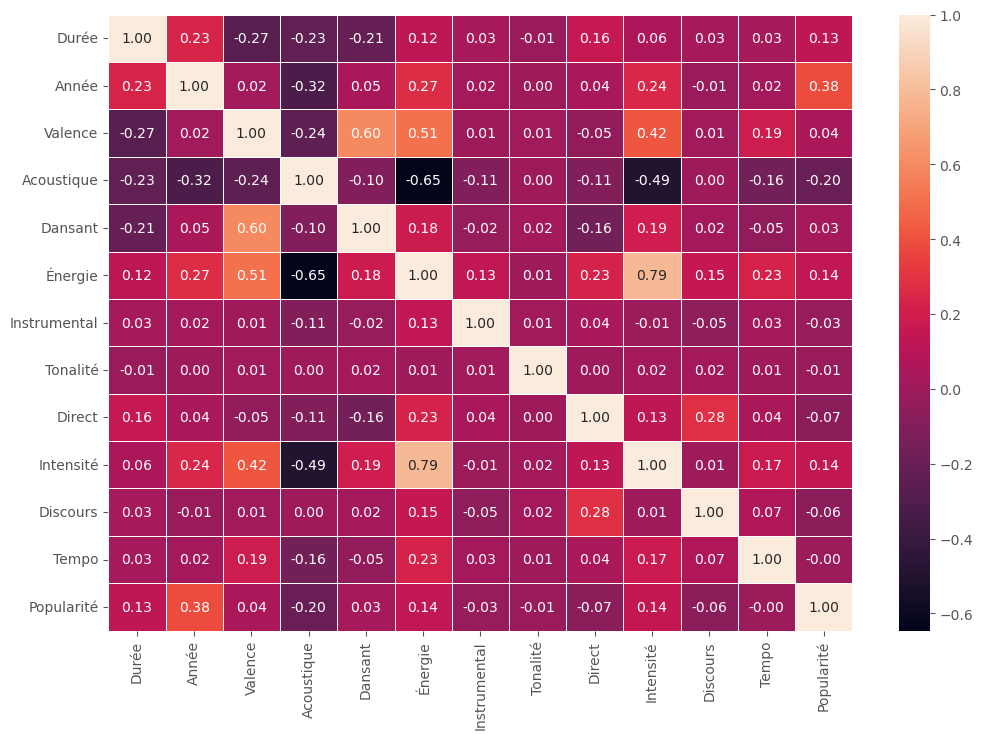

In [8]:
#créer une liste des noms des top 10 artistes 
list_top10_artiste= df_artistes_top10_sorted["Artistes"].to_list()

#filtrer pour obetenir seulement les infos des 10 artistes les plus populaires 
hm_df_artiste_top10 = df_fichier.copy()
hm_df_artiste_top10 = hm_df_artiste_top10.loc[hm_df_artiste_top10["Artistes"].isin(list_top10_artiste)]
hm_df_artiste_top10 = hm_df_artiste_top10.select_dtypes(include = ["number"])

#calculer la corrélation
corr_artiste_top10 = hm_df_artiste_top10.corr(method = "pearson")

#heatmap
fig, ax = plt.subplots(figsize=(12,8))
hm = sns.heatmap(data = corr_artiste_top10,annot=True,fmt=".2f", linewidth=.6)
plt.show()

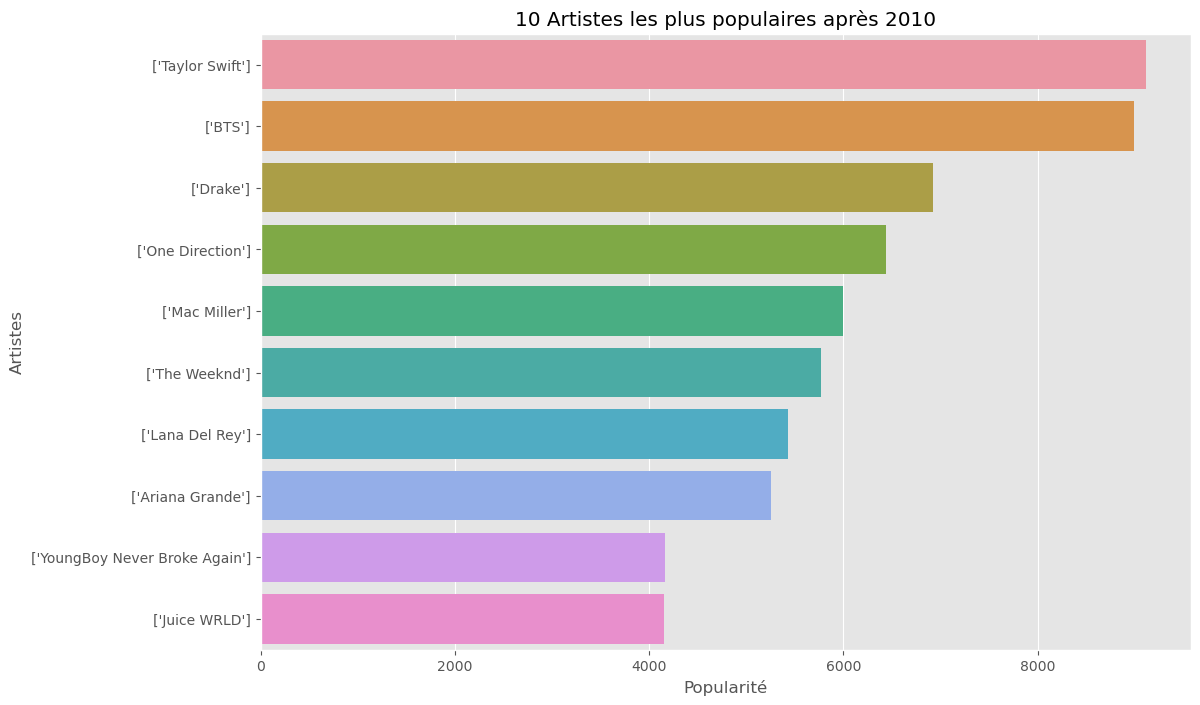

In [9]:
df_artistes_2010 = df_fichier[df_fichier["Année"] >= 2010].copy()
df_artistes_2010 = df_artistes_2010[["Artistes", "Popularité"]]
#df_artistes["Artistes"] = df_artistes["Artistes"].str.replace("["," ").str.replace("]"," ").str.replace(","," et").str.replace("'"," ")
df_artistes_2010 = df_artistes_2010.groupby("Artistes").sum().reset_index()
df_artistes_2010_sorted = df_artistes_2010 .sort_values("Popularité",ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(x ="Popularité",y="Artistes", data = df_artistes_2010_sorted).set(title='10 Artistes les plus populaires après 2010')
plt.show()



C:\Users\Ting-Wei\AppData\Local\Temp\ipykernel_8212\2134681752.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hm_2010 = sns.heatmap(data = df_fichier.corr(),annot=True,fmt=".2f", linewidth=.6)


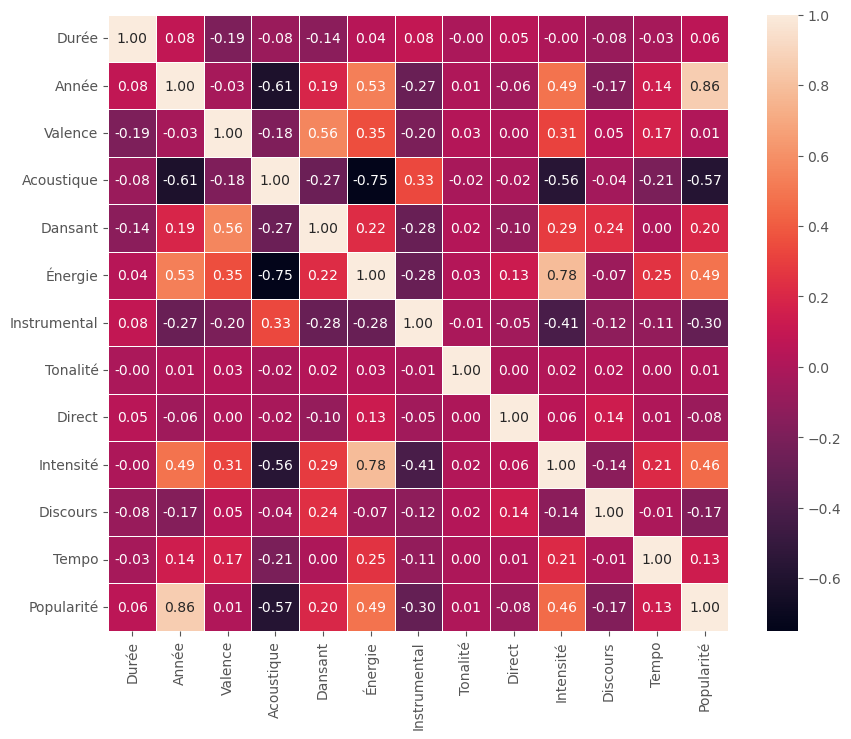

In [17]:
#créer une liste des noms des top 10 artistes après 2010
#list_top10_artiste_2010 = df_artistes_2010_sorted["Artistes"].to_list()

#filtrer pour obetenir seulement les infos des 10 artistes les plus populaires 
#hm_df_artiste_2010 = df_fichier.copy()
#hm_df_artiste_2010 = hm_df_artiste_2010.loc[hm_df_artiste_2010["Artistes"].isin(list_top10_artiste_2010)]
#hm_df_artiste_2010 = hm_df_artiste_2010.select_dtypes(include = ["number"])

#calculer la corrélation
#corr_artiste_2010 = hm_df_artiste_2010.corr(method = "pearson")

#heatmap
fig, ax = plt.subplots(figsize=(10,8))
#hm_2010 = sns.heatmap(data = corr_artiste_2010,annot=True,fmt=".2f", linewidth=.6)
hm_2010 = sns.heatmap(data = df_fichier.corr(),annot=True,fmt=".2f", linewidth=.6)
#df_fichier.corr().plot()
plt.show()

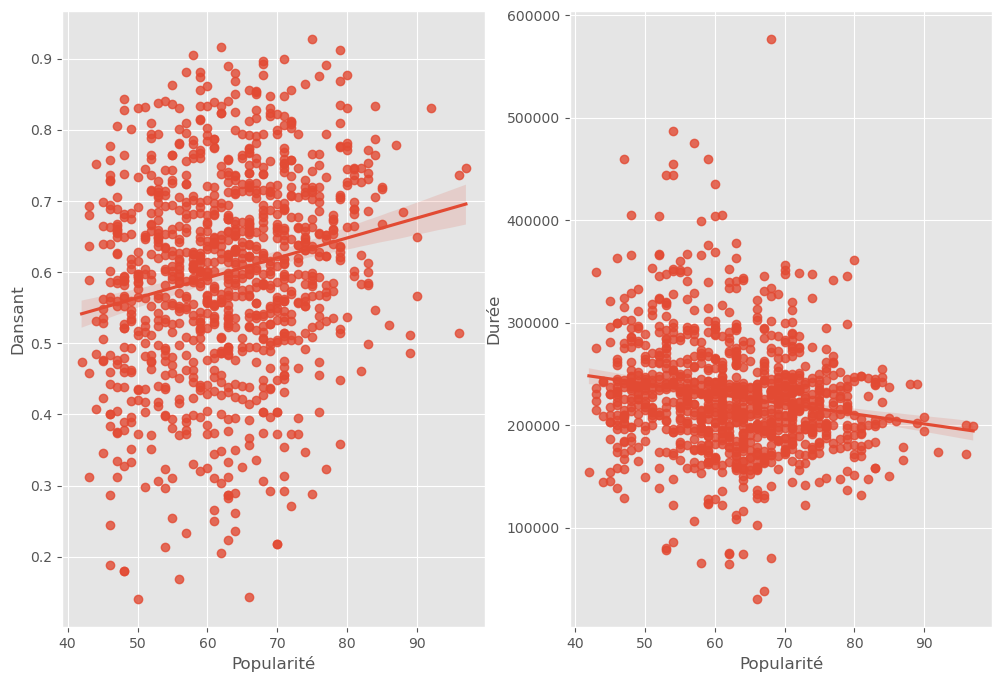

In [11]:
scatter_df_artiste = df_fichier.copy()
scatter_df_artiste_2010 = scatter_df_artiste.loc[scatter_df_artiste["Artistes"].isin(list_top10_artiste_2010)]

fig, ax = plt.subplots(1,2,squeeze=False,figsize=(12,8))
ax1 = ax[0][0]
ax2 = ax[0][1]
#ax[0][0].scatter("Popularité","Dansant",data=scatter_df_artiste_2010)#, s=tailles,  c = couleurs, alpha = 0.5, cmap = "viridis")
sns.regplot(x="Popularité",y="Dansant",data=scatter_df_artiste_2010,ax=ax1)
sns.regplot(x="Popularité",y="Durée",data=scatter_df_artiste_2010,ax=ax2)
plt.show()

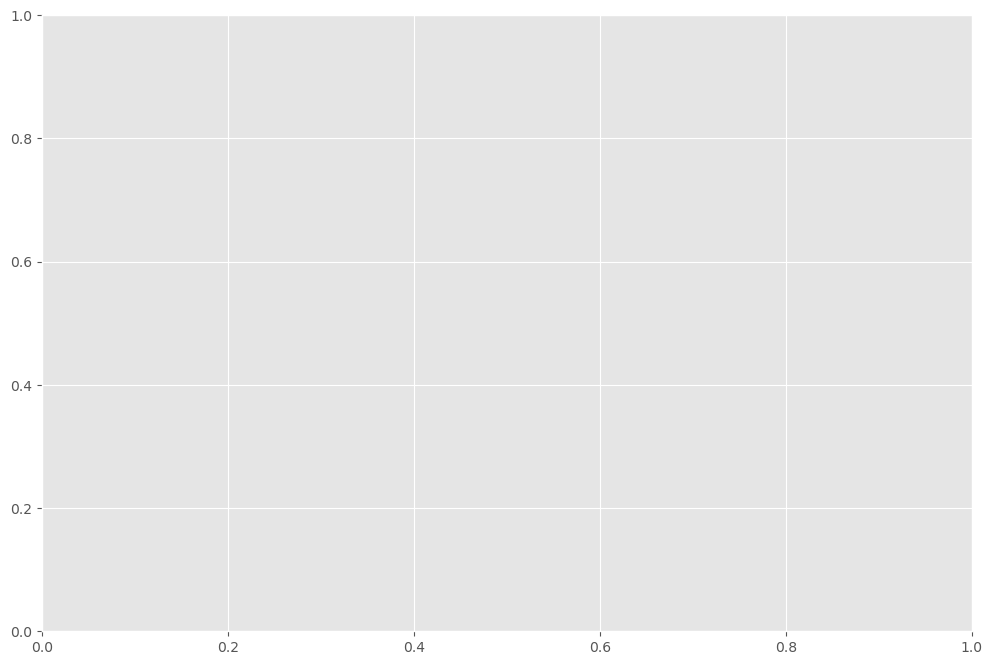

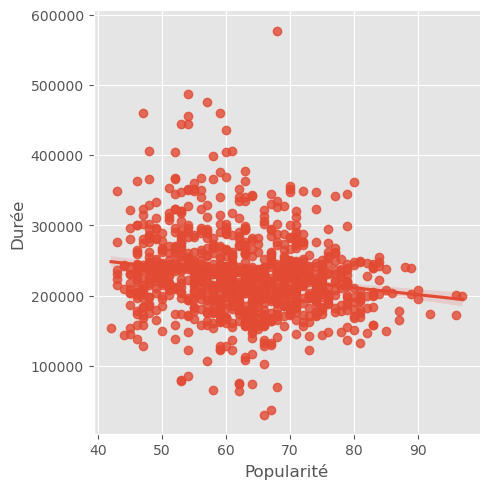

In [12]:
scatter_df_artiste = df_fichier.copy()
scatter_df_artiste_2010 = scatter_df_artiste.loc[scatter_df_artiste["Artistes"].isin(list_top10_artiste_2010)]

fig, ax = plt.subplots(figsize=(12,8))
#ax.scatter("Popularité","Dansant",data=scatter_df_artiste_2010)#, s=tailles,  c = couleurs, alpha = 0.5, cmap = "viridis")
sns.lmplot(x="Popularité",y="Durée",data=scatter_df_artiste_2010)
plt.show()